# Monte Carlo Simulation
Start by entering a stock ticker to run the Monte Carlo Simulation on.

In [35]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
ticker=input("Please enter a ticker ")
data=pd.DataFrame()
data[ticker]=wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

Please enter a ticker AAPL


In [36]:
log_returns=np.log(1+data.pct_change())

In [37]:
u=log_returns.mean()

In [38]:
var=log_returns.var()

In [39]:
drift=u-(0.5*var)

In [40]:
stdev=log_returns.std()

In [41]:
np.array(drift);

In [42]:
drift.values;

In [43]:
stdev.values;

- Please enter the number of iterations you would like to simulate.
- The more iterations, the more likely an iteration is an accurate prediction for stock price changes.
- However, these predictions are generated randomly based on the mean and standard deviation of the stock, and any one path is **not guarenteed to accurately predict the future.**

In [44]:
t_intervals=1000
try:
    iterations=int(input("Enter number of iterations/paths "))
    if iterations<0:
        raise ValueError
except ValueError:
    print("Please enter a valid positive Integer")

Enter number of iterations/paths 10


In [45]:
daily_returns=np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(t_intervals, iterations)))

In [46]:
S0=data.iloc[-1]

In [47]:
price_list=np.zeros_like(daily_returns)

In [48]:
price_list[0]=S0

In [49]:
for t in range(1, t_intervals):
    price_list[t]=price_list[t-1]*daily_returns[t]

In [50]:
price_list;

Here are the predictions in the stock changes for the next 1000 days. Each color represents a different iteration/path.

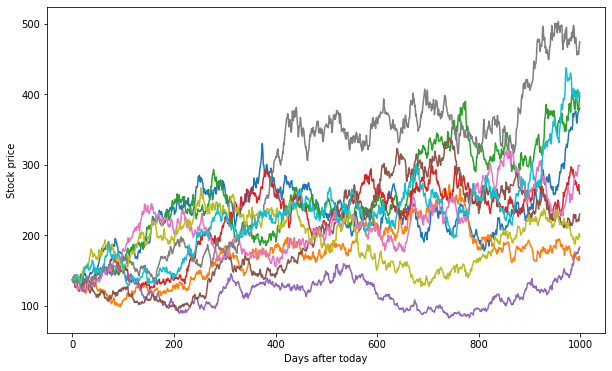

In [51]:
plt.figure(figsize=(10,6))
#possible paths of stock price
plt.xlabel("Days after today")
plt.ylabel("Stock price")
plt.plot(price_list);

- In the next cell, you can input a day in the future to see how it changes based on the simulation. 
- Please enter the **number of days in the future** the day you want to analyze is. 

In [52]:
day=int(input("Enter number of days after today "))
s=[]
for num in price_list[day]:
    s.append(round(num, 2))
print("Possible prices: {}".format(s))
print("Maximum possible price from the simulation on day {}: {}".format(day, round(max(price_list[day]),2)))
print("Minumum possible price from the simulation on day {}: {}".format(day, round(min(price_list[day]),2)))
print("Average price from the simulation on day {}: {}".format(day, round(sum(price_list[day])/len(price_list[day]),2)))

Enter number of days after today 9
Possible prices: [139.09, 142.37, 131.57, 131.06, 143.06, 125.3, 125.61, 138.85, 140.71, 143.96]
Maximum possible price from the simulation on day 9: 143.96
Minumum possible price from the simulation on day 9: 125.3
Average price from the simulation on day 9: 136.16
